## Dependancies

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

- Additional Optimization the Model 
- Additional Analysis

##### Methods to optimize model:

- Adjust the input data to ensure that no variables or outliers are causing confusion in the model, such as:
    - Dropping more or fewer columns.
    - Creating more bins for rare occurrences in columns.
    - Increasing or decreasing the number of values for each bin.
- Add more neurons to a hidden layer.
- Add more hidden layers.
- Use different activation functions for the hidden layers.
- Add or reduce the number of epochs to the training regimen.

## Preprocessing

In [2]:
# Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Check for null values
application_df.isnull().sum()

EIN                       0
NAME                      0
APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [4]:
# Drop the non-beneficial ID columns 'EIN'
application_df.drop(["EIN"], axis=1, inplace=True)

In [5]:
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [7]:
# Look at NAME value counts for binning
name_count = application_df["NAME"].value_counts()
name_count

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [8]:
list(name_count.loc[name_count < 10].index)

['HEALTH CARE FOR ALL-CALIFORNIA',
 'PHI ETA SIGMA NATIONAL HONOR SOCIETY INC',
 'RECREATION CENTERS OF SUN CITY INC',
 'ASSOCIATION OF SCHOOL BOOSTER CLUBS',
 'INTERNATIONAL SOCIETY DAUGHTERS OF UTAH PIONEERS',
 'SOUTHERN OFF ROAD BICYCLE ASSOCIATION',
 'OREGON EDUCATION ASSOCIATION',
 'NATIONAL CHRISTIAN CHARITABLE FOUNDATION INC',
 'NATIONAL COUNCIL OF NEGRO WOMEN INC',
 'INDEPENDENT ELECTRICAL CONTRACTORS INC',
 'PAGAN PRIDE PROJECT INC',
 'TUSKEGEE AIRMEN INC',
 'ALPHA PHI OMEGA',
 'SEATTLE CHILDRENS HOSPITAL',
 'FBI NATIONAL CITIZENS ACADEMY ALUMNI ASSOCIATION INC',
 'UNITED OSTOMY ASSOCIATIONS OF AMERICA INC',
 'AMERICAN CHEMICAL SOCIETY',
 'MILITARY ORDER OF THE WORLD WARS',
 'PTA FLORIDA CONGRESS',
 'NATIONAL LEAGUE OF YOUNG MEN INC',
 'AMERICAN HIBISCUS',
 'AMERICAN VOLKSSPORT ASSOCIATION INC',
 'THETA NU XI MULTICULTURAL SORORITY INC',
 'QUOTA CLUB INTERNATIONAL INC',
 'AMERICAN INSTITUTE OF GRAPHIC ARTS',
 'AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS',
 'SHRINE

In [9]:
# Choose a cutoff value and create a list of names to be replaced
names_to_replace = list(name_count.loc[name_count < 10].index)

# Replace in dataframe
for name in names_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                      21022
PARENT BOOSTER USA INC                      1260
TOPS CLUB INC                                765
UNITED STATES BOWLING CONGRESS INC           700
WASHINGTON STATE UNIVERSITY                  492
                                           ...  
CASCADE 4-H FOUNDATION                        10
FREE & ACCEPTED MASONS OF WASHINGTON          10
NEW MEXICO GARDEN CLUBS INC                   10
NATIONAL ASSOCIATION OF HISPANIC NURSES       10
UNION OF CALIFORNIA STATE WORKERS             10
Name: NAME, Length: 223, dtype: int64

In [10]:
# Look at APPLICATION_TYPE value counts for binning
application_count = application_df['APPLICATION_TYPE'].value_counts()
application_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [11]:
list(application_count.loc[application_count < 500].index)

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [12]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_count.loc[application_count < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies = pd.get_dummies(application_df)

In [14]:
# Preview numeric dataframe
application_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [15]:
# Split our preprocessed data into our features and target arrays
X = application_dummies.drop('IS_SUCCESSFUL', axis=1).values
y = application_dummies['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Check X_train_scaled shape
X_train_scaled.shape

(25724, 331)

In [18]:
# Check X_test_scaled shape
X_test_scaled.shape

(8575, 331)

## Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_feat = X_train_scaled.shape[1]

hidden_layer1 = 600
hidden_layer2 = 900

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer1, activation='relu', input_dim=input_feat))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 600)               199200    
                                                                 
 dense_1 (Dense)             (None, 900)               540900    
                                                                 
 dense_2 (Dense)             (None, 1)                 901       
                                                                 
Total params: 741,001
Trainable params: 741,001
Non-trainable params: 0
_________________________________________________________________


2022-08-08 21:32:20.905211: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 4s 5ms/step - loss: 0.4773 - accuracy: 0.7708
Epoch 2/200
804/804 [==============================] - 5s 6ms/step - loss: 0.4453 - accuracy: 0.7843
Epoch 3/200
804/804 [==============================] - 4s 5ms/step - loss: 0.4411 - accuracy: 0.7864
Epoch 4/200
804/804 [==============================] - 4s 5ms/step - loss: 0.4397 - accuracy: 0.7864
Epoch 5/200
804/804 [==============================] - 5s 6ms/step - loss: 0.4371 - accuracy: 0.7867
Epoch 6/200
804/804 [==============================] - 5s 6ms/step - loss: 0.4366 - accuracy: 0.7891
Epoch 7/200
804/804 [==============================] - 5s 6ms/step - loss: 0.4354 - accuracy: 0.7906
Epoch 8/200
804/804 [==============================] - 4s 5ms/step - loss: 0.4339 - accuracy: 0.7892
Epoch 9/200
804/804 [==============================] - 4s 5ms/step - loss: 0.4333 - accuracy: 0.7901
Epoch 10/200
804/804 [==============================] - 4s 4ms/step - loss: 0.4313 - accura

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 2.0214 - accuracy: 0.7760 - 720ms/epoch - 3ms/step
Loss: 2.0214157104492188, Accuracy: 0.7759766578674316


In [23]:
# Import dependancies for accuracy and loss plots
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

<AxesSubplot:>

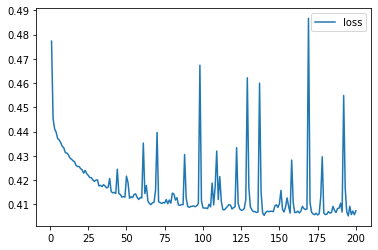

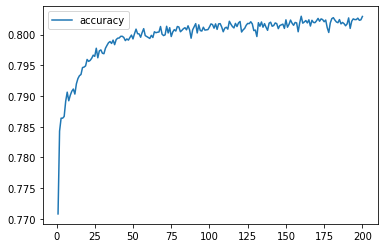

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

# Plot the accuracy
history_df.plot(y="accuracy")

In [26]:
# Export our model to HDF5 file
nn.save("results/AlphabetSoupCharity_Optimzation4.h5")

##### Report on the Neural Network Model

- The second optimised model achieves 78% accuracy with a loss of 2%

- This model again predicts 78% of applicants are successful with funding by solely dropping EIN, however epochs were increased to 200 to see if this would impact accuracy and loss. 

- Hidden layers remain the same at 600 and 900.